# Feature Engineering e Regressione Polinomiale

La regressione lineare, nella sua forma base, ci permette di costruire modelli espressi come:
$$y(x,w) = w_1x_0 + w_2x_1+ ... + w_{n}x_{n-1} + w_0 \tag{1}$$ 

Ma cosa succede quando i nostri dati o le caratteristiche presentano relazioni non lineari?

Prendiamo ad esempio il mercato immobiliare: i prezzi delle case raramente seguono un andamento lineare rispetto alla superficie abitabile. In genere, il mercato penalizza sia le abitazioni troppo piccole che quelle eccessivamente grandi.

Come possiamo sfruttare gli strumenti della regressione lineare per adattarci a queste curve non lineari? 

Ricordiamo che il "modello" a nostra disposizione dovrà modificare i parametri $w$ nell'equazione (1) per "adattare" il modello ai dati di addestramento. Tuttavia, qualunque aggiustamento dei parametri $w$ nell'equazione non sarà mai sufficiente per ottenere un buon adattamento a una curva non lineare.

La sfida, quindi, è come estendere il nostro approccio lineare per catturare relazioni più complesse presenti nei dati reali, dove le interazioni tra variabili e gli effetti non lineari sono spesso la norma piuttosto che l'eccezione.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from functions.utils import (
    run_gradient_descent_lin)

Parametri trovati tramite gradiente discendente: w: [18.69806954], b: -52.0834


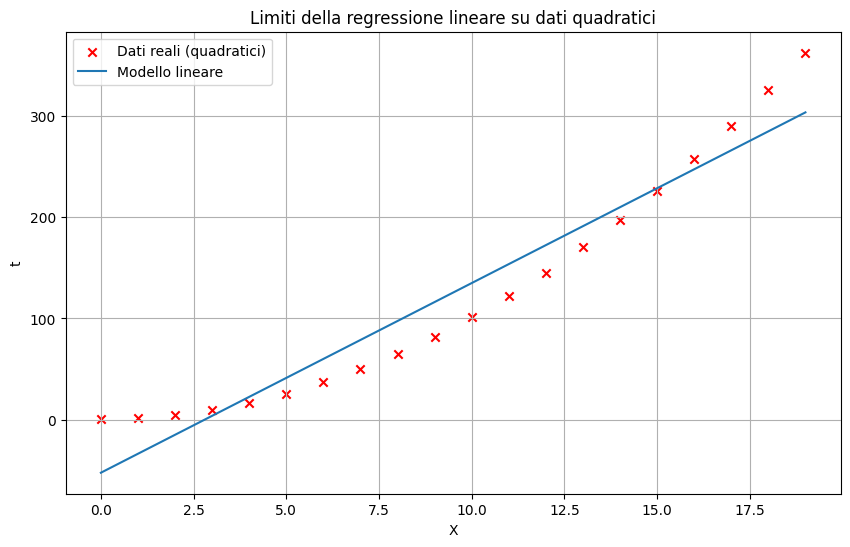

Errore quadratico medio (MSE): 881.93


In [19]:

# Creazione dei dati target
x = np.arange(0, 20, 1)
t = 1 + x**2  # Funzione quadratica
X = x.reshape(-1, 1)  # Reshape per ottenere un array 2D

# Esecuzione dell'algoritmo del gradiente discendente
model_w, model_b = run_gradient_descent_lin(X, t, iterations=1000, alpha=1e-2)

# Creazione del grafico per visualizzare il risultato
plt.figure(figsize=(10, 6))
plt.scatter(x, t, marker='x', c='r', label="Dati reali (quadratici)")
plt.plot(x, X @ model_w + model_b, label="Modello lineare")

# Aggiunta di una linea per mostrare qual è la vera relazione quadratica
x_fine = np.linspace(0, 20, 100)

plt.title("Limiti della regressione lineare su dati quadratici")
plt.xlabel("X")
plt.ylabel("t")
plt.legend()
plt.grid(True)
plt.show()

# Calcolo dell'errore quadratico medio
y_pred = X @ model_w + model_b
mse = np.mean((t - y_pred)**2)
print(f"Errore quadratico medio (MSE): {mse:.2f}")

Parametri trovati tramite gradiente discendente: w: [0.07447754 0.99957927], b: 0.0078


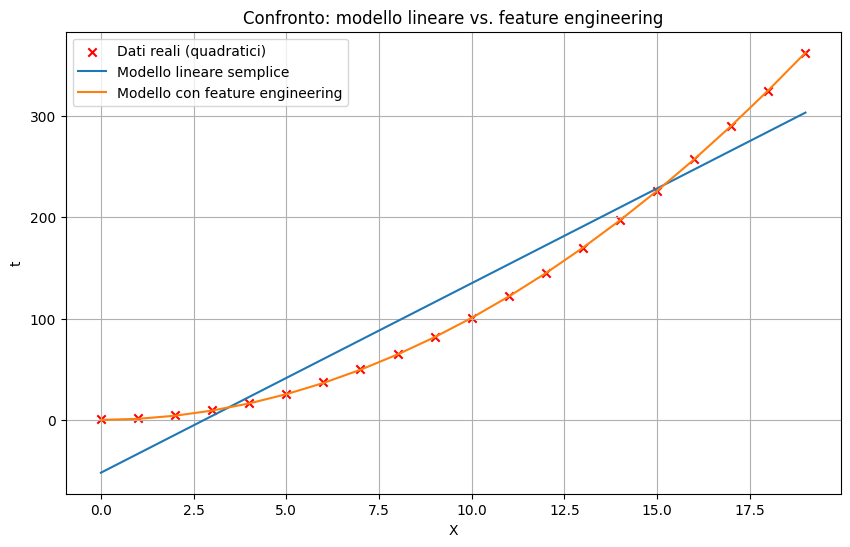

MSE del modello semplice: 881.93
MSE del modello con feature engineering: 0.26


In [20]:
# Versione con feature engineering: aggiungiamo la caratteristica x²
X_poly = np.column_stack((x, x**2))  # Ora abbiamo [x, x²]

# Eseguiamo il gradiente discendente con le nuove caratteristiche
model_w_poly, model_b_poly = run_gradient_descent_lin(X_poly, t, iterations=1000, alpha=1e-5)

# Visualizziamo i risultati
plt.figure(figsize=(10, 6))
plt.scatter(x, t, marker='x', c='r', label="Dati reali (quadratici)")
plt.plot(x, X @ model_w + model_b, label="Modello lineare semplice")
plt.plot(x, X_poly @ model_w_poly + model_b_poly, label="Modello con feature engineering")
plt.title("Confronto: modello lineare vs. feature engineering")
plt.xlabel("X")
plt.ylabel("t")
plt.legend()
plt.grid(True)
plt.show()

# Calcolo dell'errore quadratico medio per il modello con feature engineering
y_pred_poly = X_poly @ model_w_poly + model_b_poly
mse_poly = np.mean((t - y_pred_poly)**2)
print(f"MSE del modello semplice: {mse:.2f}")
print(f"MSE del modello con feature engineering: {mse_poly:.2f}")